<a href="https://colab.research.google.com/github/nikhil-xyz/Handwritten_Math_Operations/blob/main/Hanadwritten_Basic_Math_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/nikhil-xyz/Handwritten_Math_Operations.git 

Cloning into 'Handwritten_Math_Operations'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), 661 bytes | 661.00 KiB/s, done.


In [2]:
!mkdir -p ~/.kaggle
!cp Handwritten_Math_Operations/kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d sagyamthapa/handwritten-math-symbols

 86% 34.0M/39.4M [00:00<00:00, 57.6MB/s]
100% 39.4M/39.4M [00:00<00:00, 57.6MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/handwritten-math-symbols.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import numpy as np
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    shuffle = True
)

Found 10071 files belonging to 19 classes.


In [7]:
classes = dataset.class_names
classes

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'add',
 'dec',
 'div',
 'eq',
 'mul',
 'sub',
 'x',
 'y',
 'z']

In [8]:
print(len(dataset))

315


(256, 256, 3)
7


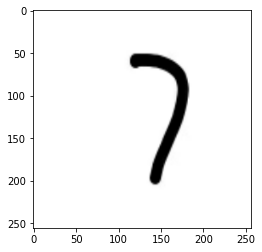

In [9]:
for image, label in dataset.take(1):
  print(image[0].shape)
  plt.imshow(image[0].numpy().astype(int))
  print(classes[label[0].numpy()])

In [10]:
train = dataset.take(int(len(dataset)*0.7))
validation = dataset.skip(len(train)).take(int(len(dataset)*0.2)+1)
test = dataset.skip(len(train) + len(validation)).take(int(len(dataset)*0.1)+1)

In [11]:
print(len(train))
print(len(validation))
print(len(test))

220
64
31


In [12]:
train = train.cache().shuffle(1000).prefetch(16)
validation = validation.cache().shuffle(1000).prefetch(16)
test = test.cache().shuffle(1000).prefetch(16)

In [13]:
scale_and_resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(256,256),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [14]:
# augmentation = tf.keras.Sequential([
#     tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
#     tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
# ])

In [18]:
model = tf.keras.models.Sequential([
    scale_and_resize,
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(len(dataset), 256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(classes), activation='softmax')
])

model.build(input_shape = (len(dataset), 256, 256, 3))

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics = ['accuracy']
)

In [20]:
history = model.fit(train, epochs=10, validation_data=validation)

Epoch 1/10
220/220 [==============================] - 20s 87ms/step - loss: 1.5767 - accuracy: 0.5303 - val_loss: 0.5250 - val_accuracy: 0.8394
Epoch 2/10
220/220 [==============================] - 19s 85ms/step - loss: 0.4112 - accuracy: 0.8795 - val_loss: 0.3382 - val_accuracy: 0.8975
Epoch 3/10
220/220 [==============================] - 19s 85ms/step - loss: 0.1773 - accuracy: 0.9428 - val_loss: 0.2298 - val_accuracy: 0.9346
Epoch 4/10
220/220 [==============================] - 19s 85ms/step - loss: 0.0873 - accuracy: 0.9733 - val_loss: 0.1962 - val_accuracy: 0.9458
Epoch 5/10
220/220 [==============================] - 19s 84ms/step - loss: 0.0712 - accuracy: 0.9746 - val_loss: 0.1934 - val_accuracy: 0.9473
Epoch 6/10
220/220 [==============================] - 19s 85ms/step - loss: 0.0576 - accuracy: 0.9830 - val_loss: 0.2718 - val_accuracy: 0.9360
Epoch 7/10
220/220 [==============================] - 19s 85ms/step - loss: 0.0283 - accuracy: 0.9916 - val_loss: 0.2923 - val_accuracy:

In [21]:
model.evaluate(test)

31/31 [==============================] - 14s 35ms/step - loss: 0.2495 - accuracy: 0.9471


[0.24947534501552582, 0.9471006989479065]